In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.image as mpimg
%matplotlib inline

In [9]:

from keras.layers import Dense, Flatten, Activation, MaxPooling2D, Lambda
from keras.models import Sequential
from keras.layers.core import Lambda
from keras.layers.convolutional import Convolution2D
from keras.optimizers import SGD, Adam, RMSprop

In [10]:
# generator

# read the csv file
driving_df = pd.read_csv('data\driving_log.csv')

In [4]:
driving_df.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [5]:
#for line in driving_df:
#    print(1)

In [11]:
images_filenames = []
measurements = [] 

for index, row in driving_df.iterrows():
    filename = row['center'][4:]
    images_filenames.append(filename)
    measurement = float(row['steering'])
    measurements.append(measurement)
    if index == 20000:
        break
    

In [12]:
print(len(images_filenames))
#gray = plt.imshow(images[0], cmap='gray')
#plt.imsave('gray_sample.jpg', gray)

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(images_filenames, measurements, test_size=0.25, random_state=101)

8036


In [13]:
from keras.layers import Cropping2D

In [35]:
def generator(X_data, y_data, batch_size):
    
    num_samples = len(X_data)
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_x = []
            batch_y = []
            for i in range(0, batch_size):
                filename = X_data[i]
                current_path = 'data/IMG/' + filename
                batch_x_one = cv2.imread(current_path)
                batch_x_one = cv2.cvtColor(batch_x_one, cv2.COLOR_BGR2GRAY)
                batch_x_one = np.expand_dims(batch_x_one[:, :], 2)
                batch_x.append(batch_x_one)
                batch_y.append(y_data[i])
        #batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            batch_x = np.asarray(batch_x)
            #batch_x = batch_x.reshape(-1, 160, 320, 3)
            batch_y = np.asarray(batch_y)
        
            yield batch_x, batch_y
    
batch_x, batch_y = next(generator(X_train, y_train, 32))

In [16]:
batch_size = 32
epochs = 10

In [38]:
train_generator = generator(X_train, y_train, batch_size)
valid_generator = generator(X_valid, y_valid, batch_size)

32
160
(160, 320)


(160, 320, 1)

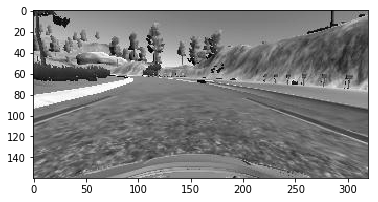

In [34]:
plt.imshow(batch_x[31], cmap='gray')
print(len(batch_x))
print(len(batch_x[0]))
print(batch_x[0].shape)
image = np.expand_dims(batch_x[0][:, :], 2)
image.shape

In [18]:
len(X_train)
activation_relu = 'relu'

In [41]:
model = Sequential()
#model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,3)))
#x = x.reshape((-1, 100, 100, 1))

model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,1)))
'''
model.add(Convolution2D(24, 5, 5, border_mode='same', subsample=(2, 2)))
model.add(Activation(activation_relu))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Convolution2D(36, 5, 5, border_mode='same', subsample=(2, 2)))
model.add(Activation(activation_relu))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Convolution2D(48, 5, 5, border_mode='same', subsample=(2, 2)))
model.add(Activation(activation_relu))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Convolution2D(64, 3, 3, border_mode='same', subsample=(1, 1)))
model.add(Activation(activation_relu))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Convolution2D(64, 3, 3, border_mode='same', subsample=(1, 1)))
model.add(Activation(activation_relu))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
'''
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
#model.fit(X_train, y_train, validation_split=0.2, shuffle=True)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_8 (Lambda)            (None, 160, 320, 1)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51201     
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________


In [40]:
model = Sequential()

# Crop 70 pixels from the top of the image and 25 from the bottom
#model.add(Cropping2D(cropping=((70, 25), (0, 0)),
#                     dim_ordering='tf', # default
#                     input_shape=(160, 320, 3)))

# Resize the data
#model.add(Lambda(resize_comma))

model.add(Lambda(lambda x: (x/255.0) - 0.5))

model.add(Convolution2D(16, 8, 8, subsample=(4, 4), border_mode="same"))
#model.add(ELU())

model.add(Convolution2D(32, 5, 5, subsample=(2, 2), border_mode="same"))
#model.add(ELU())

model.add(Convolution2D(64, 5, 5, subsample=(2, 2), border_mode="same"))

model.add(Flatten())
# model.add(Dropout(.2))
#model.add(ELU())

model.add(Dense(512))
# model.add(Dropout(.5))
#model.add(ELU())

model.add(Dense(50))
#model.add(ELU())

model.add(Dense(1))

adam = Adam(lr=0.0001)

model.compile(optimizer=adam, loss="mse", metrics=['accuracy'])
#model.summary()

C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (8, 8), strides=(4, 4), padding="same")`
C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), strides=(2, 2), padding="same")`
C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), strides=(2, 2), padding="same")`


In [42]:

model.fit_generator(train_generator, 
                    samples_per_epoch=len(X_train), 
                    steps_per_epoch=len(X_train)/batch_size,
                    validation_data=valid_generator,
                    validation_steps=len(X_valid)/batch_size,
                    verbose=2,
                    shuffle=True,
                    nb_epoch=epochs)

C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:9: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=6027, validation_data=<generator..., validation_steps=62.78125, verbose=2, shuffle=True, epochs=10)`


Epoch 1/10
 - 225s - loss: 0.0111 - acc: 0.4646 - val_loss: 0.0344 - val_acc: 0.6562
Epoch 2/10
 - 209s - loss: 0.0146 - acc: 0.4638 - val_loss: 0.0380 - val_acc: 0.6562
Epoch 3/10
 - 205s - loss: 0.0143 - acc: 0.4643 - val_loss: 0.0533 - val_acc: 0.6562
Epoch 4/10


KeyboardInterrupt: 